In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from gensim.models.word2vec import Word2Vec

In [3]:
from collections import OrderedDict

english_models = OrderedDict([
    (year, Word2Vec.load('models/bpo/{}.bin'.format(year)))
    for year in range(1820, 1940, 20)
])

In [4]:
french_models = OrderedDict([
    (year, Word2Vec.load('models/criticism/{}.bin'.format(year)))
    for year in range(1820, 1940, 20)
])

In [5]:
def cosine_series(models, anchor, query):
    
    series = OrderedDict()
    
    for year, model in models.items():
        
        series[year] = (
            model.similarity(anchor, query)
            if query in model else 0
        )

    return series

def english_cosine_series(anchor, query):
    return cosine_series(english_models, anchor, query)

def french_cosine_series(anchor, query):
    return cosine_series(french_models, anchor, query)

In [6]:
import numpy as np
import statsmodels.api as sm

def lin_reg(series):

    x = np.array(list(series.keys()))
    y = np.array(list(series.values()))

    x = sm.add_constant(x)

    return sm.OLS(y, x).fit()

In [7]:
from PyDictionary import PyDictionary

dictionary = PyDictionary()

In [24]:
def plot_cosine_series(en_anchor, en_query, fr_anchor, fr_query, w=5, h=4):
    
    en_series = english_cosine_series(en_anchor, en_query)
    fr_series = french_cosine_series(fr_anchor, fr_query)
    
    en_fit = lin_reg(en_series)
    fr_fit = lin_reg(fr_series)

    en_x1 = list(en_series.keys())[0]
    en_x2 = list(en_series.keys())[-1]

    en_y1 = en_fit.predict()[0]
    en_y2 = en_fit.predict()[-1]

    fr_x1 = list(fr_series.keys())[0]
    fr_x2 = list(fr_series.keys())[-1]

    fr_y1 = fr_fit.predict()[0]
    fr_y2 = fr_fit.predict()[-1]
    
    # print(en_query, fr_query)
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    
    ax1.set_ylim([0, 1])
    ax1.set_title(en_query)
    ax1.plot(list(en_series.keys()), list(en_series.values()))
    ax1.plot([en_x1, en_x2], [en_y1, en_y2], color='gray', linewidth=0.5)
    
    ax2.set_ylim([0, 1])
    ax2.set_title(fr_query)
    ax2.plot(list(fr_series.keys()), list(fr_series.values()))
    ax2.plot([fr_x1, fr_x2], [fr_y1, fr_y2], color='gray', linewidth=0.5)

poetry poésie
journalism journalisme
sociology sociologie
art art
rhetoric rhétorique
polite poli
codex codex


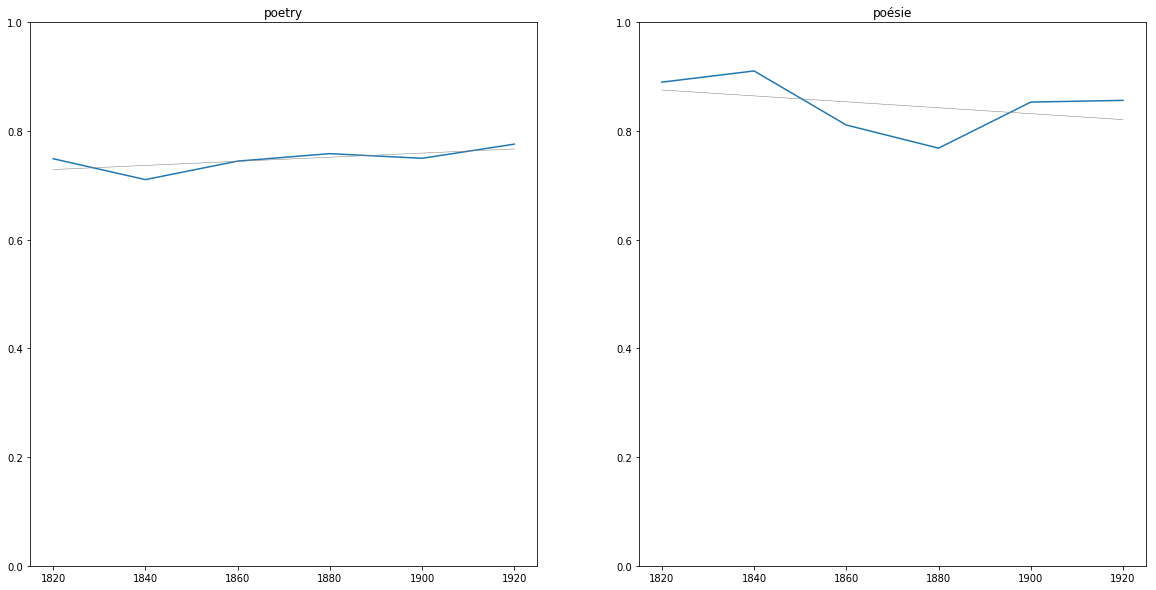

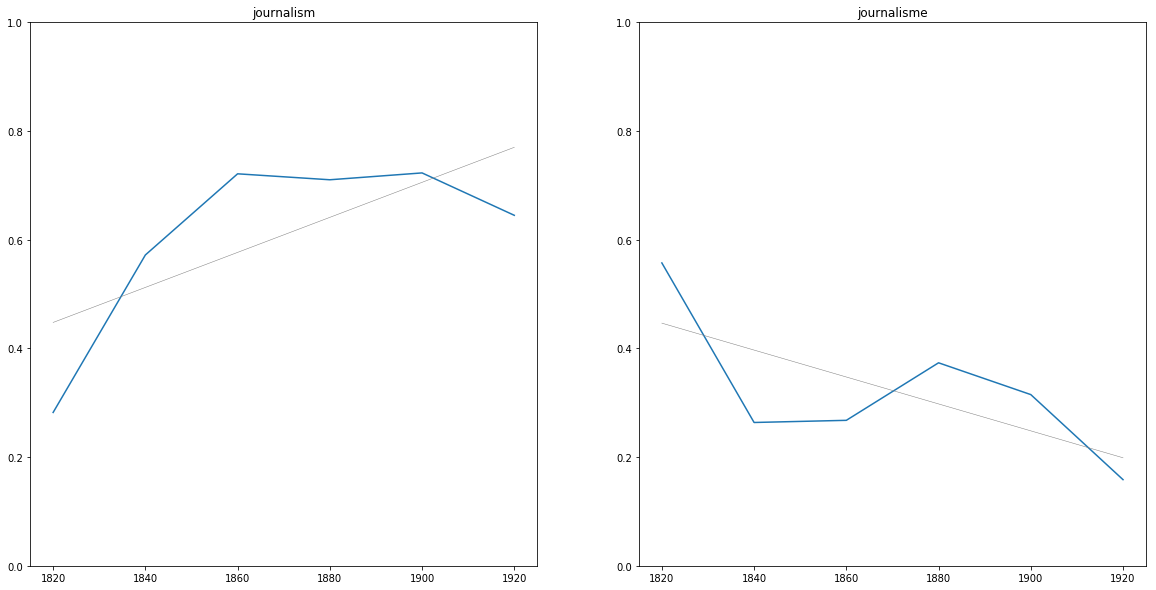

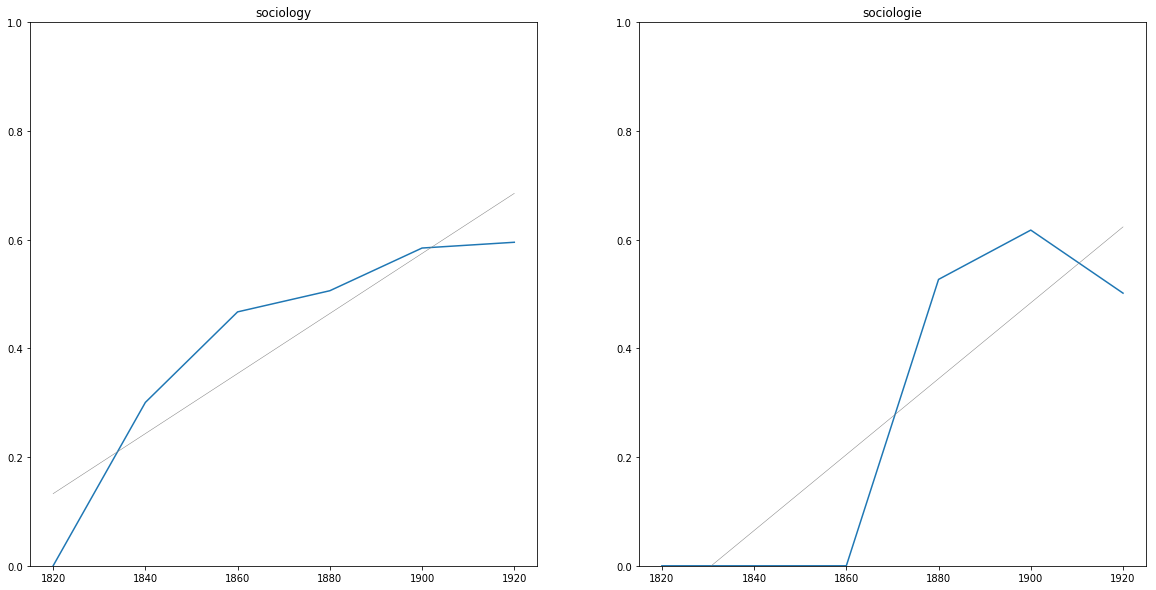

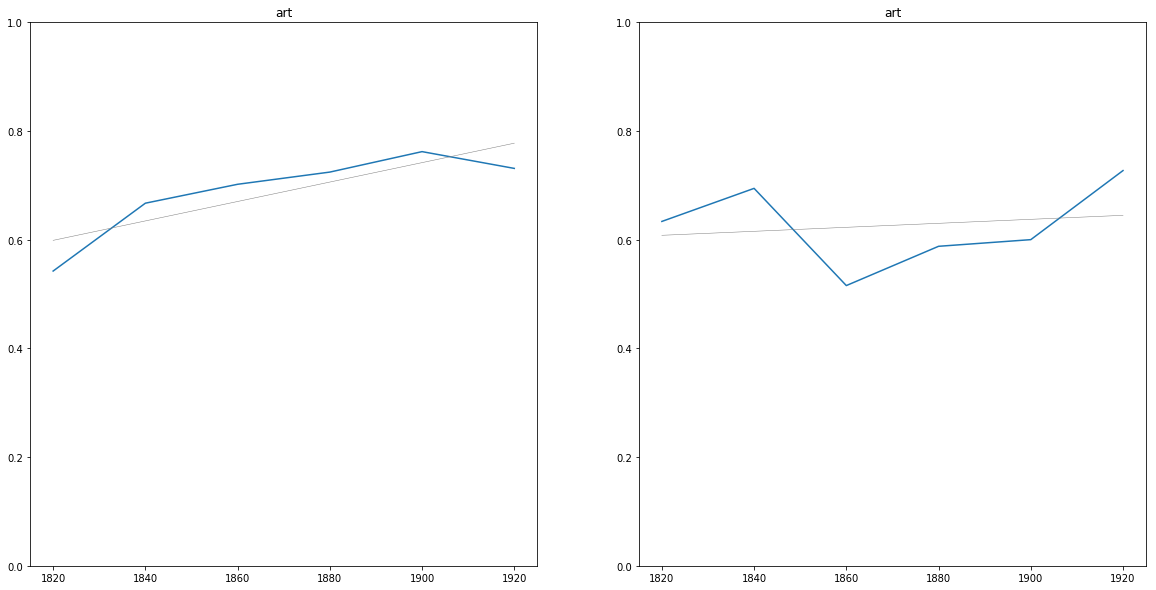

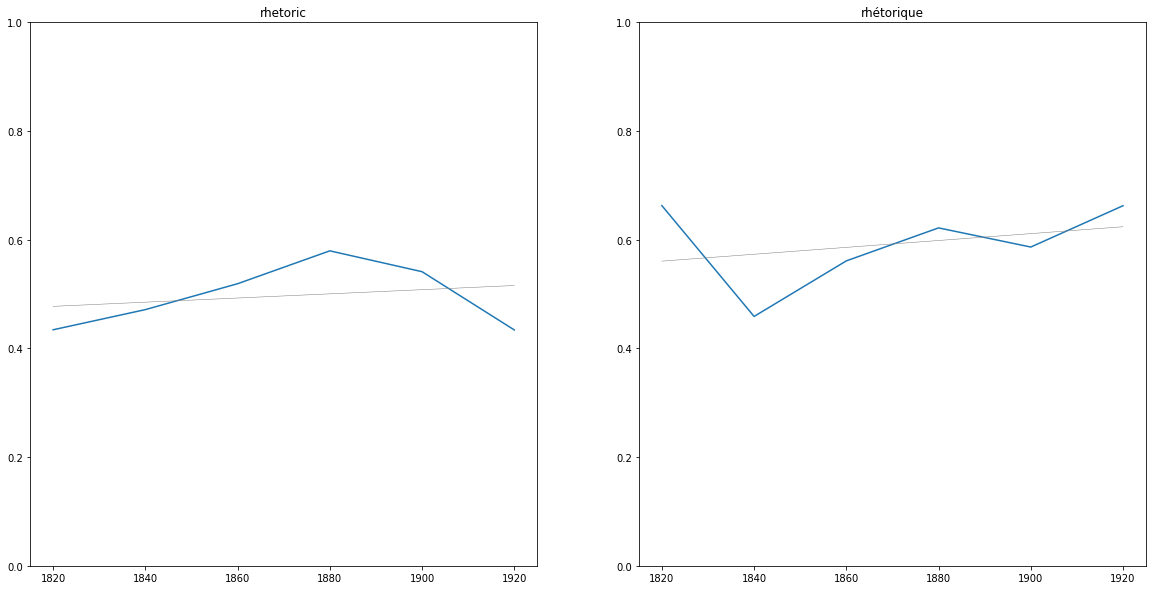

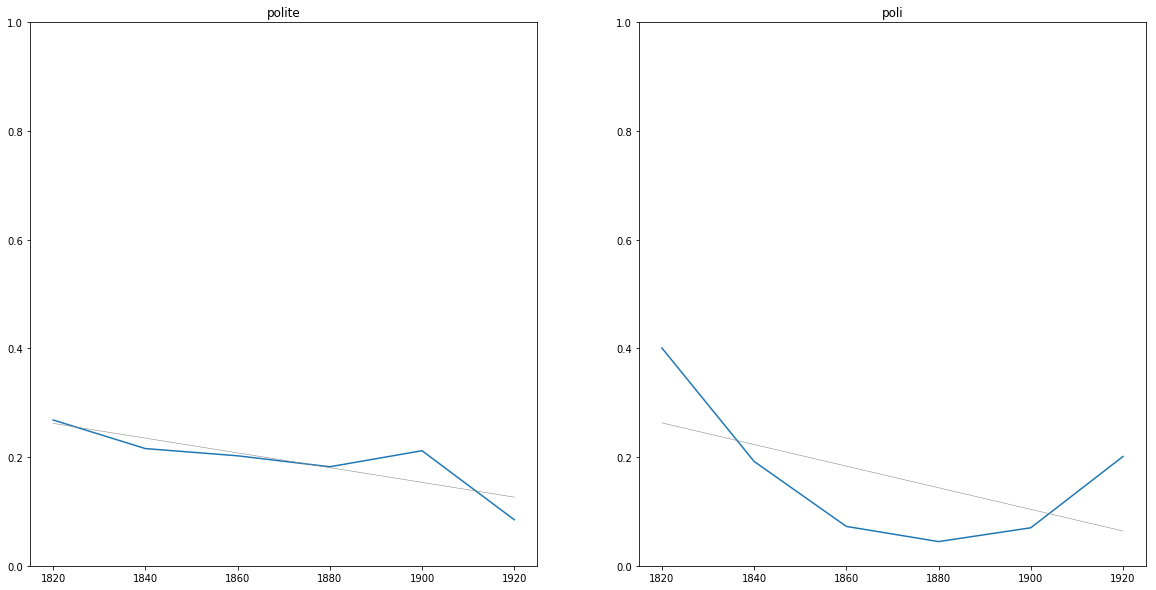

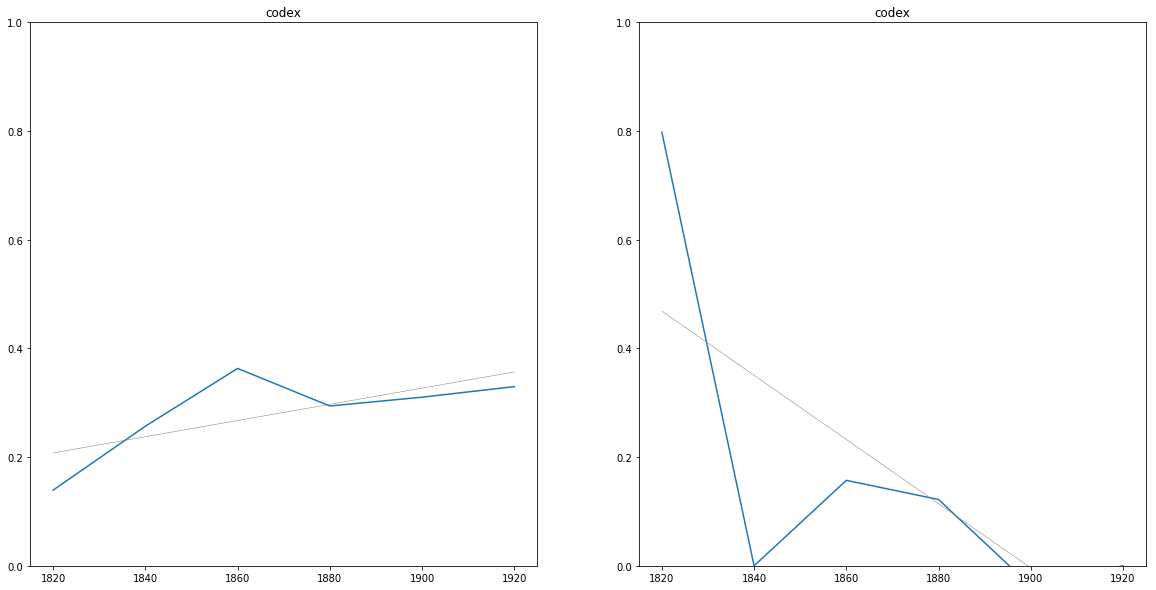

In [31]:
plot_cosine_series('literature', 'poetry', 'littérature', 'poésie')
plot_cosine_series('literature', 'journalism', 'littérature', 'journalisme')
plot_cosine_series('literature', 'sociology', 'littérature', 'sociologie')
plot_cosine_series('literature', 'art', 'littérature', 'art')
plot_cosine_series('literature', 'rhetoric', 'littérature', 'rhétorique')
plot_cosine_series('literature', 'polite', 'littérature', 'poli')
plot_cosine_series('literature', 'codex', 'littérature', 'codex')